#### Настройки с учетом версий библиотеки scikit-learn

In [1]:
# альтернативный синтаксис для sklearn 0.18
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
if Version(sklearn_version) < '0.18':
    from sklearn.grid_search import train_test_split
else:
    from sklearn.model_selection import train_test_split

#### Импорт набора данных

In [2]:
import numpy as np
import pandas as pd

url = 'mammographic_masses.data'
df = pd.read_csv(url, header=None)
df

,0,1,2,3,4,5
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


#### Устранение строк с пропущенными значениями

In [3]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

0     2
1     5
2    31
3    48
4    76
5     0
dtype: int64

In [4]:
df.dropna(inplace=True)
df

,0,1,2,3,4,5
0,5,67,3,5,3,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
8,5,57,1,5,3,1
10,5,76,1,4,3,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


#### Разделение данных на тренировочный и тестовый наборы (70:30)

In [5]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

#### Стандартизация признаков

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#### Модель 1

In [7]:
from keras import models
from keras import layers, losses
from keras import optimizers
from keras import metrics

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(6, activation='relu', input_shape=(4,)))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    
    return model

Using TensorFlow backend.


In [8]:
model = build_model()
history = model.fit(X_train_std,
                    y_train,
                    epochs=50,
                    batch_size=16,
                    verbose=0,
                    validation_split=0.3)

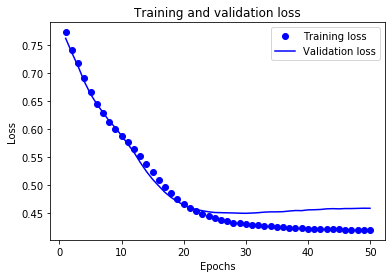

In [9]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

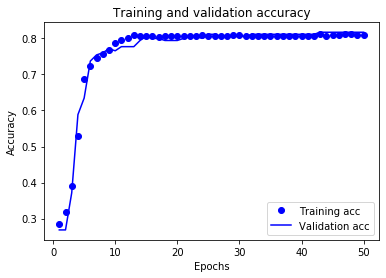

In [10]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [11]:
model = build_model()
model.fit(X_train_std, y_train, epochs=15, batch_size=16, verbose=0)

loss, accuracy, precision, recall = model.evaluate(X_test_std, y_test, verbose=0)
print('recall: %.2f' % recall)
print('precision: %.2f' % precision)
print('accuracy: %.2f' % accuracy)

recall: 0.86
precision: 0.71
accuracy: 0.77


#### Модель 2

In [12]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(2, activation='relu', input_shape=(4,)))
    model.add(layers.Dense(2, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    
    return model

In [13]:
model = build_model()
model.fit(X_train_std, y_train, epochs=7, batch_size=8, verbose=0)

loss, accuracy, precision, recall = model.evaluate(X_test_std, y_test, verbose=0)
print('recall: %.2f' % recall)
print('precision: %.2f' % precision)
print('accuracy: %.2f' % accuracy)

recall: 0.79
precision: 0.71
accuracy: 0.75
